<a href="https://colab.research.google.com/github/dudgus7477/datascience/blob/main/25.%20(%EC%8B%A4%EC%8A%B5%EC%9A%A9)%20%ED%8C%A8%EC%85%98%20%EC%9D%B4%EB%AF%B8%EC%A7%80%20%EB%B6%84%EB%A5%98%ED%95%98%EA%B8%B0(CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CNN 알고리즘
- 합성곱 신경망, 컨볼루션 신경망이라고 부름
- 입력된 이미지에서 다시 한 번 특징을 추출하기 위해 커널(슬라이딩 윈도)을 도입하는 기법

##CNN 적용하여 패션 이미지 분류

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

In [ ]:
print(X_train.shape)
print(X_test.shape)

#### 28x28 픽셀의 이미지가 train = 60000개, test = 10000개

종류는 다음과 같음.
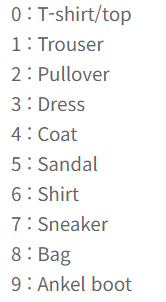

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.title(Y_train[i])
    plt.imshow(X_train[i])

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10,8))
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary) # 흑백으로 출력
    plt.xlabel(class_names[Y_train[i]])
plt.show()

In [ ]:
#정규화 및 원핫인코딩
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
y_train = to_categorical(Y_train)
y_test = to_categorical(Y_test)

In [ ]:
#CNN을 적용한 알고리즘
model = Sequential()
model.add(   (32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu')) #필터 개수
model.add(   (64,(3,3), activation='relu'))
model.add(    (pool_size=(2,2)))
model.add(    (0.25))
model.add(    ())
model.add(    (128, activation='relu'))
model.add(    (0.5))
model.add(     (10, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
modelpath="./data/model/MNIST_CNN.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [ ]:
history = model.fit(X_train, y_train, validation_split=0.25, epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback,checkpointer])

In [ ]:
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))

In [ ]:
# 인공지능이 잘 구분한 것과 잘 구분하지 않은 것 살펴보기
predicted_classes = np.argmax(model.predict(X_test), axis=1)
correct_indices = np.nonzero(predicted_classes == Y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != Y_test)[0]

In [ ]:
plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  correct = correct_indices[i]
  plt.imshow(X_test[correct].reshape(28,28), cmap = 'gray')
  plt.title("Predicted {}, Class {}".format(predicted_classes[correct], Y_test[correct]))
  plt.tight_layout()

In [ ]:
plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  incorrect = incorrect_indices[i]
  plt.imshow(X_test[incorrect].reshape(28,28), cmap = 'gray')
  plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], Y_test[incorrect]))
  plt.tight_layout()

## 모델 검증하기(예측 테스트)

In [ ]:
#내가 테스트 하고 싶은 것 눈으로 확인하고 인공지능의 예측 결과 비교하기
plt.figure()
plt.imshow(X_test[])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
y_test[  ]

In [ ]:
output = model.predict(X_test)
print("결과는 : ", np.argmax(output[  ]))

In [ ]:
output[  ]